In [100]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [101]:
T = 10000

In [106]:
@jit(nopython=True)
def slotted_aloha(N, p):
    sender = np.zeros(N)
    total = 0
    time = 0

    for _ in range(T):
        tx_count = 0
        tx_index = -1
        end = 0

        for n in range(len(sender)):
            if sender[n] == 0:
                sender[n] = 2
                tx_count += 1
                tx_index = n
            elif sender[n] == 1:
                if (random.random() <= p):
                    sender[n] = 2
                    tx_count += 1
                    tx_index = n
            elif sender[n] == 3:
                end += 1

        if end == N:
            break
        
        if tx_count == 1:
            sender[tx_index] = 1
            total += 1

        elif tx_count > 1:
            for n in range(len(sender)):
                if sender[n] == 2:
                    sender[n] = 1
        time += 1
    
    return total/time

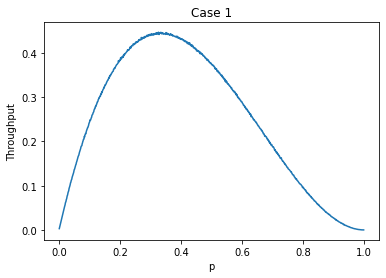

In [107]:
#Case 1
results = []
a = np.arange(0.001, 1, 0.001)

for z in np.arange(0.001, 1, 0.001):
    test=0
    for _ in range(20):
        test += slotted_aloha(3, z)
    results.append(test/20)

plt.plot(a, results)
plt.xlabel("p")
plt.ylabel("Throughput")
plt.title("Case 1")
plt.show()

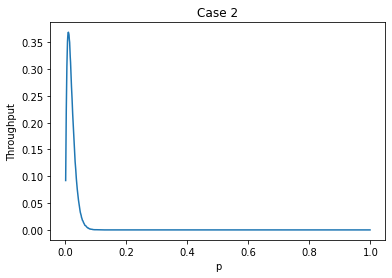

In [108]:
#Case 2
results = []
a = np.arange(0.001, 1, 0.001)

for z in np.arange(0.001, 1, 0.001):
    test=0
    for _ in range(10):
        test += slotted_aloha(100, z)
    results.append(test/10)

plt.plot(a, results)
plt.xlabel("p")
plt.ylabel("Throughput")
plt.title("Case 2")
plt.show()

In [109]:
newp = (max(range(len(results)), key=results.__getitem__)*0.001) + 0.001

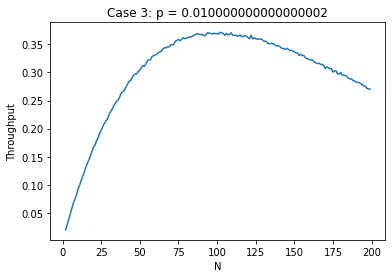

In [110]:
#Case 3
results = []
a = np.arange(2, 200, 1)

for z in np.arange(2, 200, 1):
    test=0
    for _ in range(10):
        test += slotted_aloha(z, newp)
    results.append(test/10)

plt.plot(a, results)
plt.xlabel("N")
plt.ylabel("Throughput")
plt.title(f"Case 3: p = {newp}")
plt.show()